In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
!pip install xgboost

  Using cached xgboost-2.1.1-py3-none-win_amd64.whl (124.9 MB)


In [8]:
math = pd.read_csv('student-mat.csv',delimiter=";")

In [9]:
math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


<Figure size 1100x700 with 0 Axes>

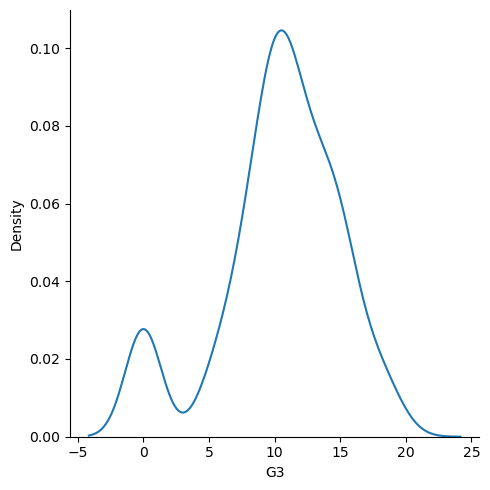

In [35]:
plt.figure(figsize=(11,7))
sns.displot(data=math,x='G3',kind="kde")

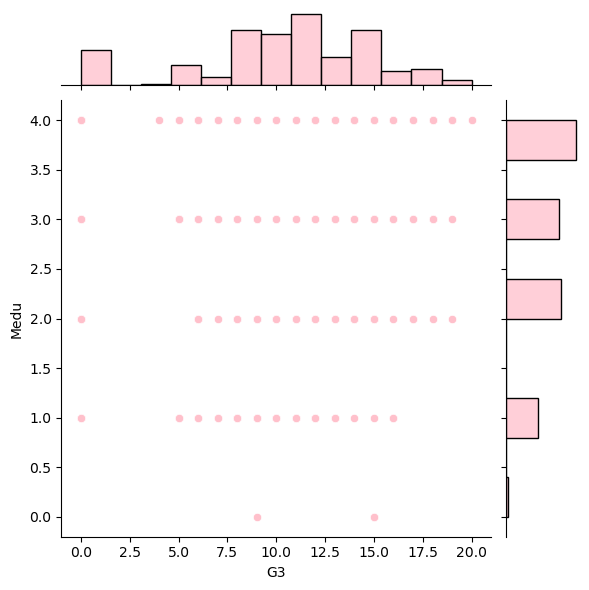

In [10]:
sns.jointplot(x='G3',y='Medu',data=math,color='pink')

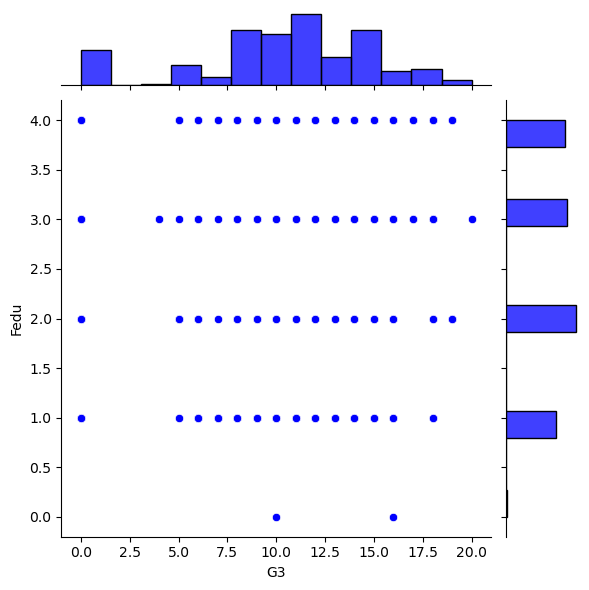

In [11]:
sns.jointplot(x='G3',y='Fedu',data=math,color='blue')

In [14]:
math.corr()

C:\Users\hp\AppData\Local\Temp\ipykernel_10944\3177191103.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  math.corr()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [57]:
#split the dataset into indipendent variables and dipendent ones
X = math.drop('G3',axis=1)
y = math['G3']

from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoding to categorical columns
X = pd.get_dummies(X)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=7)

In [59]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Define the XGBoost model
model = XGBClassifier(n_estimators=15, max_depth=10, learning_rate=1, 
                      objective='multi:softmax', num_class=len(np.unique(y_train_encoded)),
                      eval_metric="auc")

# Train the model
model.fit(X_train, y_train_encoded)

XGBClassifier(num_class=18, objective='multi:softmax')

In [60]:
print(model)

XGBClassifier(num_class=18, objective='multi:softmax')


In [77]:
predictions = model.predict(X_test)

In [78]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 4 2 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 3 1 5 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 2 2 9 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 3 7 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 9 2 3 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 2 4 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 2 3 3 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 7 6 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 3 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]]
              precision    recall  f1-score   support

           0       0.69      1.00      0.82         9
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.00   

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.

In [79]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 6.87%
